In [2]:
import serial

serialPort = serial.Serial(port = "COM7", baudrate=921600,
                           bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE)

In [3]:
#Loading MNIST dataset
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
X_train=train_X.reshape(-1,784)
X_test=test_X.reshape(-1,784)

In [4]:
#Converting the pixel value to bytes.
print('Converting the integer pixel value to byte format.')
import numpy as np
Byte_X_train=[]
for i in range(X_train.shape[0]):
    byte_X_train=[]
    for j in range(X_train.shape[1]):
        byte_X_train.append(bytes([X_train[i][j]]))
    Byte_X_train.append(byte_X_train)

Converting the integer pixel value to byte format.


## Testing serial communication

In [ ]:
import time
toSend = []

#Simulating the MNIST pixel transmission.
# Generating Byte_toSend array that has values from 0 to 255 and length of 784
for i in range(784):
    if i >= 256 and i < 256*2:
        toSend.append(i-256)
    elif i >= 256*2 and i < 256*3:
        toSend.append(i-2*256)
    elif i >= 256*3 :
        toSend.append(i-3*256)
    else:
        toSend.append(i)
Byte_toSend = []
for val in toSend:
    Byte_toSend.append(bytes([val]))
    
serialPort.reset_input_buffer()
serialPort.reset_output_buffer()

while(1):
    serialString = ""                           # Used to hold data coming over UART
    print('-----------Received data from FPGA.-----------')
    for val in Byte_toSend:
        sent_val = serialPort.write(val)
        time.sleep(0.1)
        if(serialPort.in_waiting > 0):
            serialString = serialPort.readlines()
            for string in serialString:
                received_data=list(string)
                print(received_data)
        
            

## Testing for MNIST

********************Expected label is 1 *******************



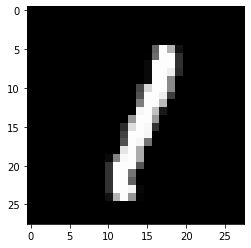

Byte stream created. Sending now: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 100 255 180  18   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1 109 253 253  48   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   9 253 253 253  48
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 

In [7]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure
while(1):
    serialPort.reset_input_buffer()
    serialPort.reset_output_buffer()
    sending_sample = np.random.randint(0,X_train.shape[0])
    print('********************Expected label is {} *******************\n'.format(train_y[sending_sample]))
    plt.imshow(train_X[sending_sample], cmap='gray')
    plt.show()

    print('Byte stream created. Sending now: {}'.format(X_train[sending_sample]))
    print('Sent bytes of length {}.'.format(len(X_train[sending_sample])))
    serialString = ""                           # Used to hold data coming over UART
    for val in Byte_X_train[sending_sample]:
        sent_val = serialPort.write(val)
    #print('Number of bytes sent is: {}. '.format(sent_val))
    count_received_data = 0
    while(1):
        # Wait until there is data waiting in the serial buffer
        if(serialPort.in_waiting > 0):
            # Read data out of the buffer until a carraige return / new line is found
            #serialString = serialPort.readline()
            #received_data=list(serialString)
            #print('-----------Received data from FPGA.-----------')
            #print(received_data)
            #print('Length of received data {}'.format(len(received_data)))
            #print('Last byte received is label.')
            #break
            serialString = serialPort.readlines()
            print('-----------Received data from FPGA.-----------')
            for string in serialString:
                received_data=list(string)
                print(received_data)
                count_received_data = count_received_data + len(received_data) 
            print('Length of received data {}'.format(count_received_data))
            print('Last byte received is label.')
            break
            #Sanity check that sent and received pixels values are same.
            #for i,j in zip(X_train[sending_sample], received_data):
            #    if i!=j:
            #        print(i,j)
    print('Do you want to continue: press Y for yes and N for no.')
    continue_command = input()
    if continue_command == 'Y' or continue_command =='y':
        clear_output(wait=True)
    else:
        print('Thank you for using decision tree inference in FPGA.')
        break

# END

















<br> 












<br> 